<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/3%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1%E1%84%8B%E1%85%AF%E1%86%AF%E1%84%8B%E1%85%AD%E1%84%8B%E1%85%B5%E1%86%AF_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8(%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer learning

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3    #텐서플로에서 제공되는 다양한 사전학습 모델

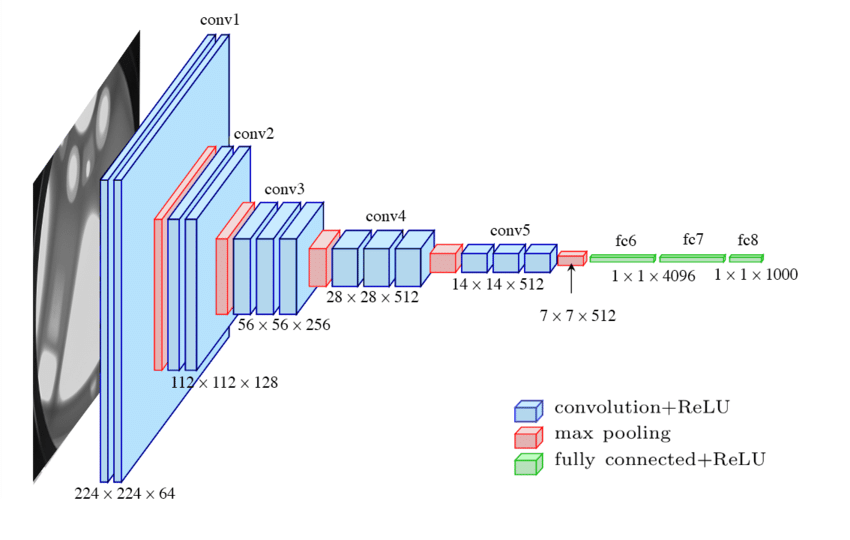

In [2]:
base_model = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=True,  #사전 학습된 특징 추출기 + 사전학습된 분류기
                                         input_shape=(224,224,3))
base_model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
base_model = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False, #사전 학습 특징 추출기기
                                         input_shape=(240,240,3))


base_model.trainable = False

base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                              

In [4]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

In [5]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,320,644
Trainable params: 1,605,956
Non-trainable params: 14,714,688
_________________________________________________________________


## Data Augmentation

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

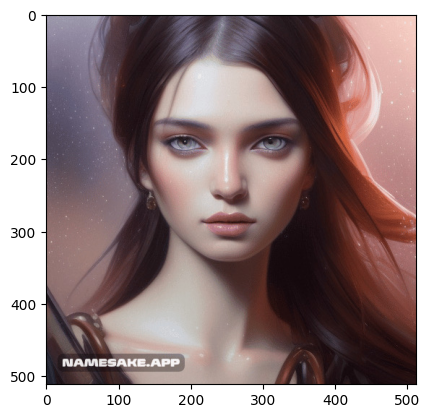

In [8]:
img = image.load_img('/content/애옹이.JPG', target_size=(512, 512))
plt.imshow(img)
plt.show()



*   rotation_range - 사진 회전, 각도 범위: 0~180
*   width_shift_range, height_shift_range - 수평,수직 평행 이동, 전체 너비와 높이에 대한 비율값
*   zoom_range - 사진 확대
*   horizontal_flip - 수평으로 뒤집음
*   fill_mode - 회전이나 이동을 통해 빈 곳이 생기면 픽셀을 채우는 방법(default=nearest, constant, reflect, wrap)




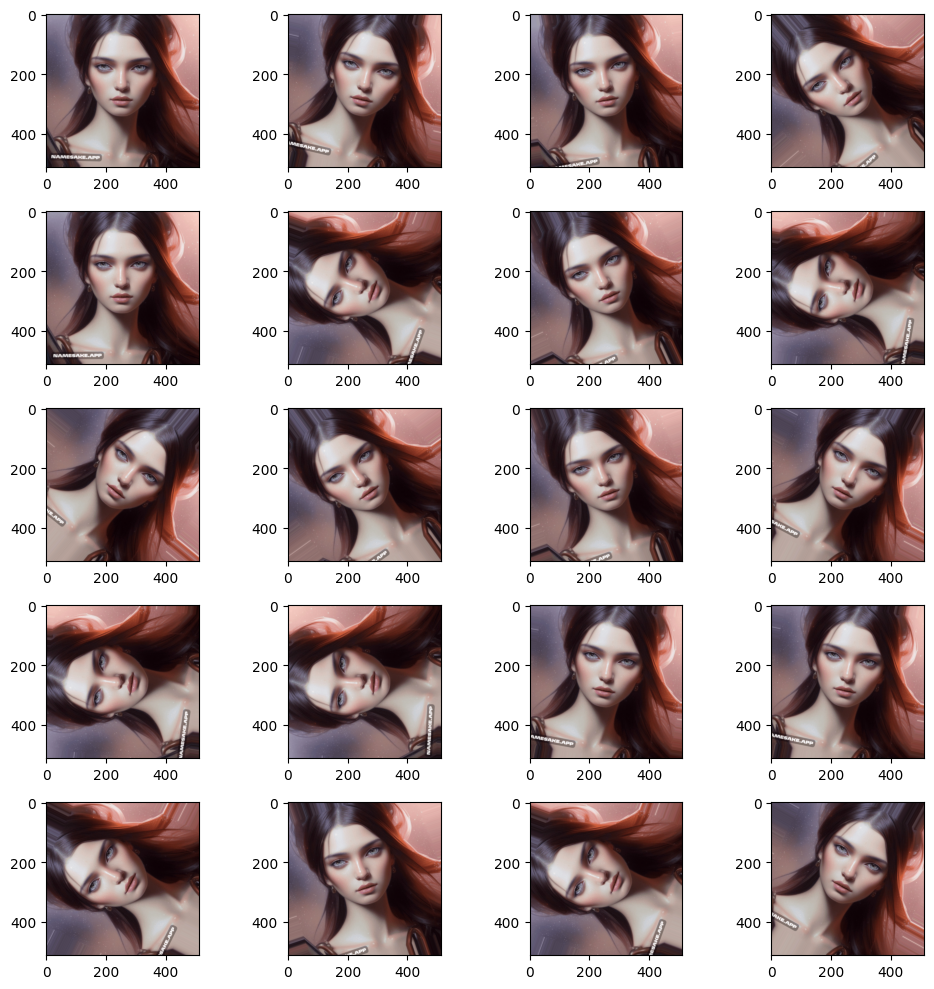

In [15]:
datagen = ImageDataGenerator(
                              rotation_range = 90,)
                              # width_shift_range=0.4,)
                              # height_shift_range=0.4,)
                              # zoom_range=0.4,)
                              # vertical_flip =True,
                              # horizontal_flip =True,
                              # fill_mode='nearest') # constant, nearest, wrap

# (512, 512, 3, 1)
# ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
image_batch = np.expand_dims(img, axis=0)

idx = 0
fig = plt.figure(figsize=(10, 10))
axs = []
for batch in datagen.flow(image_batch , batch_size=1): 
    axs.append(fig.add_subplot(5, 4, idx+1))
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx%20 == 0:
        break
fig.tight_layout()
plt.show()